Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Loading the data and Setting up the Working Directory

In [2]:
os.chdir(r'C:\Users\91973\Desktop\Data\Insurance')
os.listdir()

['insurance.csv']

In [3]:
data = pd.read_csv('insurance.csv')

Preview of the data

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data has 7 variables and 1338 observations. 6 independent variables and 1 dependent variable(Response Variable).
There are 3 categorical variables and 4 numerical variables

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the data

### Exploratory Data Analysis

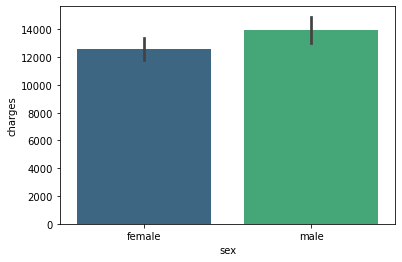

In [8]:
sns.barplot(x = 'sex',y = 'charges', data = data,palette='viridis');

from the graph it is very clear that Males have Higher charges than females but the difference is not too high

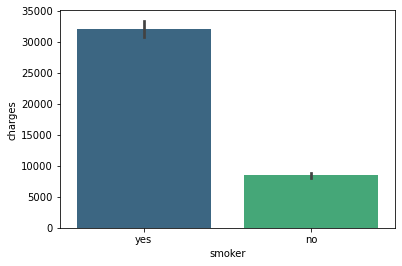

In [9]:
sns.barplot(x = 'smoker',y = 'charges', data = data,palette='viridis');

The difference between smokers and non smokers is very understandable. The average charges for non smokers is around 7.5k and for smokers the charges are around 32K

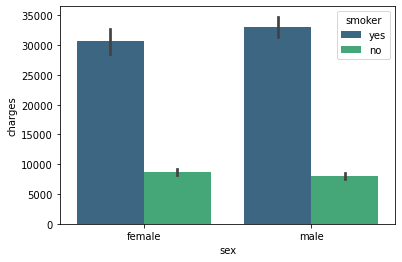

In [10]:
sns.barplot(x = 'sex',y = 'charges', data = data,palette='viridis', hue='smoker');

Let us check if there is any relationship between region and charges

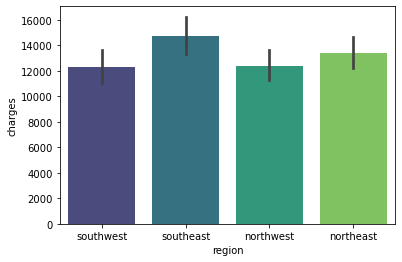

In [11]:
sns.barplot(x = 'region',y = 'charges', data = data,palette='viridis');

There appears to be some kind of relationship between region and charges and by the graph southeast has the highest charges among the regions

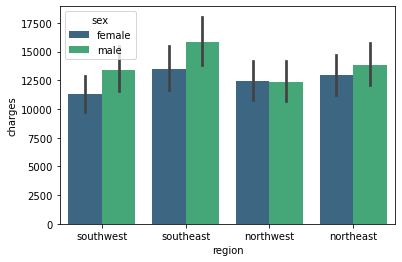

In [12]:
sns.barplot(x = 'region',y = 'charges', data = data,palette='viridis',hue = 'sex');

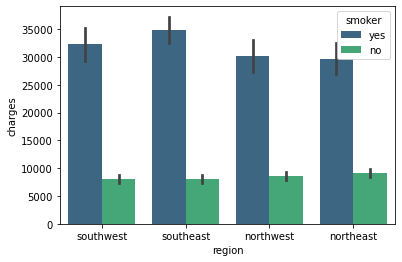

In [13]:
sns.barplot(x = 'region',y = 'charges', data = data,palette='viridis',hue = 'smoker');

The charges for non smokers is pretty constant across all the 4 regions

Checking for correlation among the numerical variables

In [14]:
corr = data.corr()
print(corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Age and BMI have higher correlation with charges

<AxesSubplot:>

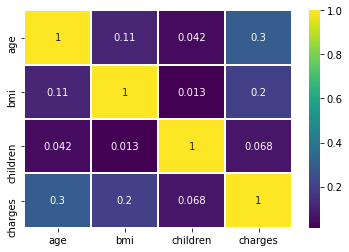

In [19]:
sns.heatmap(corr,linecolor='white',linewidths=1,annot=True,cmap='viridis',cbar=True)

In [20]:
response_variable = ['charges']
x = data.drop(columns=response_variable)
y = data[response_variable]

In [21]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [24]:
type(y)

pandas.core.frame.DataFrame

Splitting the data into Training and Test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

Let us encode the categorical variables

In [27]:
smoke = {'yes':1,'no':0}
data.smoker = data.smoker.map(smoke)

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [28]:
x_train.smoker = x_train.smoker.map(smoke)

C:\Users\91973\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
one_enc = OneHotEncoder(sparse=False)

We will encode 'sex' and 'region' using OneHotEncoder

In [35]:
colns_to_encode = ['sex','region']
enc_data = one_enc.fit_transform(x_train[colns_to_encode])
enc_data = pd.DataFrame(enc_data,index=x_train.index)
enc_data.columns = one_enc.get_feature_names(input_features=colns_to_encode)
x_train = pd.concat([x_train,enc_data],axis=1)
x_train.drop(columns=colns_to_encode,inplace=True)

Let us check our training data

In [36]:
x_train.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.32,0,0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52,24.86,0,0,1.0,0.0,0.0,0.0,1.0,0.0
969,39,34.32,5,0,1.0,0.0,0.0,0.0,1.0,0.0
486,54,21.47,3,0,1.0,0.0,0.0,1.0,0.0,0.0


Let us train our first regression model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
LR_model = LinearRegression()

In [39]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [40]:
LR_model.score(x_train,y_train)

0.7417255854683333

In [41]:
LR_model.intercept_

array([-12400.10014039])

In [43]:
LR_model.coef_

array([[ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02,
         2.36511289e+04,  9.29584582e+00, -9.29584582e+00,
         4.59585244e+02,  8.89079180e+01, -1.98279052e+02,
        -3.50214110e+02]])

In [97]:
from sklearn.metrics import mean_squared_error,r2_score
import math

For making predictions on the test data set, first we need to preprocess the x_test data as we did for X_train.
i.e. Encoding Categorical Variables

In [45]:
x_test.smoker = x_test.smoker.map(smoke)
enc_data_test = one_enc.fit_transform(x_test[colns_to_encode])
enc_data_test = pd.DataFrame(enc_data_test,index=x_test.index)
enc_data_test.columns = one_enc.get_feature_names(input_features=colns_to_encode)
x_test = pd.concat([x_test,enc_data_test],axis=1)
x_test.drop(columns=colns_to_encode,inplace=True)

C:\Users\91973\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
y_pred = LR_model.predict(x_test)

In [48]:
loss_LR = math.sqrt(mean_squared_error(y_test,y_pred))
loss_LR

5796.284659276274

In [49]:
from sklearn.linear_model import Ridge,Lasso

In [50]:
Ridge_model = Ridge()

In [51]:
Ridge_model.fit(x_train,y_train)

Ridge()

In [52]:
Ridge_model.coef_

array([[ 2.56782283e+02,  3.36954353e+02,  4.25811991e+02,
         2.35150208e+04,  5.36628631e+00, -5.36628631e+00,
         4.58723644e+02,  8.54434231e+01, -1.92394747e+02,
        -3.51772319e+02]])

In [58]:
Ridge_model.intercept_

array([-12361.09330397])

In [54]:
Ridge_model.score(x_train,y_train)

0.7417048535740767

In [55]:
Lasso_model = Lasso()

In [56]:
Lasso_model.fit(x_train,y_train)

Lasso()

In [57]:
Lasso_model.score(x_train,y_train)

0.7417253820547576

There seems to be no much difference between the models as the scores of all 3 models is approximatly 74%

As we can see some difference in the scale of measurement among the variables - age,bmi,children

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
S_scaler = StandardScaler()

In [61]:
colns_to_scale = ['age','bmi','children']
scaled_df = S_scaler.fit_transform(x_train[colns_to_scale])

In [63]:
scaled_df

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [64]:
scaled_df = pd.DataFrame(scaled_df,index=x_train.index)

In [66]:
scaled_df.columns = colns_to_scale

In [76]:
x_train_scaled = pd.concat([scaled_df,x_train.drop(columns=colns_to_scale)],axis=1)

In [77]:
x_train_scaled.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.543313,-1.033082,-0.911192,0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.898745,-0.943687,-0.911192,0,1.0,0.0,0.0,0.0,1.0,0.0
969,-0.025379,0.622393,3.202629,0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.040918,-1.504893,1.557100,0,1.0,0.0,0.0,1.0,0.0,0.0


In [78]:
LR_model.fit(x_train_scaled,y_train)

LinearRegression()

In [79]:
LR_model.intercept_

array([8486.36371144])

In [80]:
LR_model.coef_

array([[ 3.61497541e+03,  2.03622812e+03,  5.16890247e+02,
         2.36511289e+04,  9.29584582e+00, -9.29584582e+00,
         4.59585244e+02,  8.89079180e+01, -1.98279052e+02,
        -3.50214110e+02]])

In [81]:
LR_model.score(x_train_scaled,y_train)

0.7417255854683333

In [82]:
scaled_df_test = S_scaler.fit_transform(x_test[colns_to_scale])
scaled_df_test = pd.DataFrame(scaled_df_test,index=x_test.index)
scaled_df_test.columns = colns_to_scale
x_test_scaled = pd.concat([scaled_df_test,x_test.drop(columns=colns_to_scale)],axis=1)

In [84]:
y_pred_sc = LR_model.predict(x_test_scaled)

In [85]:
loss_sc = math.sqrt(mean_squared_error(y_pred_sc,y_test))

In [86]:
loss_sc

5795.33253301876

In [87]:
Ridge_model.fit(x_train_scaled,y_train)

Ridge()

In [88]:
Ridge_model.intercept_

array([8514.20712875])

In [89]:
Ridge_model.score(x_train_scaled,y_train)

0.7417046137259666

As we can see by scaling the data proper weights are assigned to the variables as per their importance. The performance of the models remain same after scaling the data

Lets try some other models to check if there is any improvement in the accuracy

### Decision Trees

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
DT_model = DecisionTreeRegressor(random_state=42)

In [92]:
DT_model.fit(x_train_scaled,y_train)

DecisionTreeRegressor(random_state=42)

In [93]:
DT_model.score(x_train_scaled,y_train)

0.9983078124756305

In [94]:
y_pred_DT = DT_model.predict(x_test_scaled)

In [95]:
loss_DT = math.sqrt(mean_squared_error(y_pred_DT,y_test))

In [96]:
loss_DT

6174.863160058989

In [98]:
r2_score(y_pred_DT,y_test)

0.7552689167932841

In [99]:
r2_score(y_pred,y_test)

0.7088351277198331

In [100]:
r2_score(y_pred_sc,y_test)

0.708581462340378

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
RF_Model = RandomForestRegressor()

In [103]:
RF_Model.fit(x_train_scaled,y_train)

<ipython-input-103-d2159e67fc66>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(x_train_scaled,y_train)


RandomForestRegressor()

In [104]:
RF_Model.score(x_train_scaled,y_train)

0.9753911785098603

In [105]:
y_pred_RF = RF_Model.predict(x_test_scaled)

In [106]:
loss_RF = math.sqrt(mean_squared_error(y_pred_RF,y_pred))
loss_RF

4612.677415945705

In [119]:
r2_score(y_pred_RF,y_test)

0.8437338168519757

### XgBoost

In [108]:
import xgboost as xgb

In [110]:
from xgboost import XGBRFRegressor

In [111]:
XGB_RF = XGBRFRegressor()

In [112]:
XGB_RF.fit(x_train_scaled,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [114]:
XGB_RF.score(x_train_scaled,y_train)

0.9044234837093734

In [115]:
y_pred_XBG_RF = XGB_RF.predict(x_test_scaled)

In [116]:
loss_XGB_RF = math.sqrt(mean_squared_error(y_pred_XBG_RF,y_test))

In [117]:
loss_XGB_RF

4356.28064624595

In [118]:
r2_score(y_pred_XBG_RF,y_test)

0.859878674644609

Using XGboostRF the accuracy has increased to 86% from 70% on LinearRegression and 75% on Decision Trees